# SwarmMPL Clipboard Tutorial: 1) Basics

The Clipboard object can be used to plot waveforms, spectrograms, or both. The name "Clipboard" comes from SWARM's "Clipboard" panel to visualize data.

Clipboard is an extension of Matplotlib's Figure object so that users can modify it as needed. Clipboard also has special built-in methods for easier use.

Create a Clipboard object by passing an ObsPy Stream object. 
Clipboard will make a SubFigure for each Trace in Stream. Merge Streams as desired before calling Clipboard.

This example shows:
- default usage of the Clipboard object
- modifying settings for spectrograms and waveforms
- changing the time axes from UTC to relative (e.g., seconds)

The Clipboard object can be used to plot waveforms, spectrograms, or both. The name "Clipboard" comes from SWARM's "Clipboard" panel to visualize data.

Clipboard is an extension of Matplotlib's Figure object so that users can modify it as needed. Clipboard also has special built-in methods for easier use.

Create a Clipboard object by passing an ObsPy Stream object. 
Clipboard will make a SubFigure for each Trace in Stream. Merge Streams as desired before calling Clipboard.

This example shows:
- default usage of the Clipboard object
- modifying settings for spectrograms and waveforms
- changing the time axes from UTC to relative (e.g., seconds)


In [9]:
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime
from vdapseisutils.sandbox.swarmmpl.clipboard import Clipboard
from vdapseisutils.sandbox.swarmmpl import colors as vdap_colors

## Default Usage
### Low Frequency Earthquakes at Gareloi, Alaska

5 Trace(s) in Stream:
AV.GAEA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GALA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANE..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANO..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GASW..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples


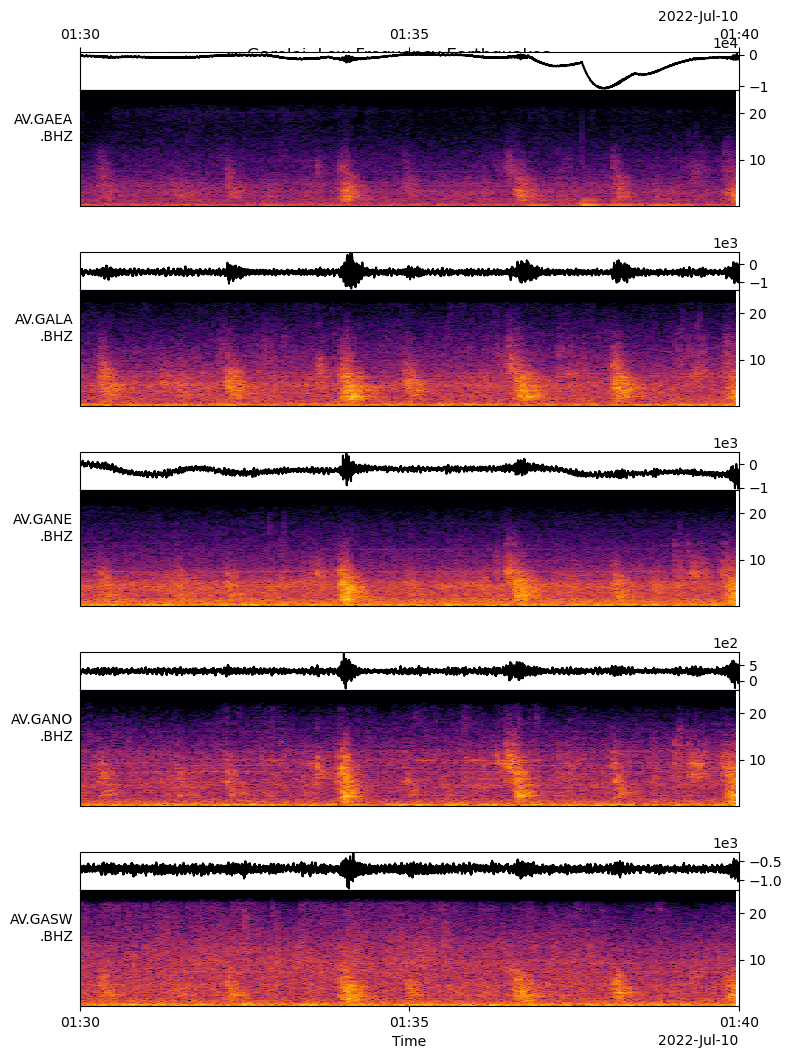

In [10]:
# Read a miniseed file with low frequency earthquakes from Gareloi volcano, Alaska
# Slice the data to a 10 minute window
suptitle = "Gareloi: Low Frequency Earthquakes"
st = read("../data/waveforms/gareloi_test_data_20220710-010000.mseed")
st = st.slice(UTCDateTime("2022/07/10 01:30:00"), UTCDateTime("2022/07/10 01:39:59.999"))
print(st)

fig = Clipboard(st)  # Clipboard adds axes for the waveform and spectrogram by default
fig.plot()  # Plot the Clipboard
fig.suptitle(suptitle)  # Add a title
plt.show()  # show the plot

## Modify spectrogram and wave settings
### (Mount St Helens, Washington)

By default, Clipboard plots both the waveform ("w") and the spectrogram ("g"). You can plot only the waveform by setting mode="w" or plot only the spectrogram with mode="g".

Control the spectrogram settings with set_spectrogram().
Control the waveform settings with set_wave().

Axes limits can be defined with...
- set_alim  # for the waveform y-axes limits
- set_flim  # for the spectrogram frequency axes (y-axes) limits

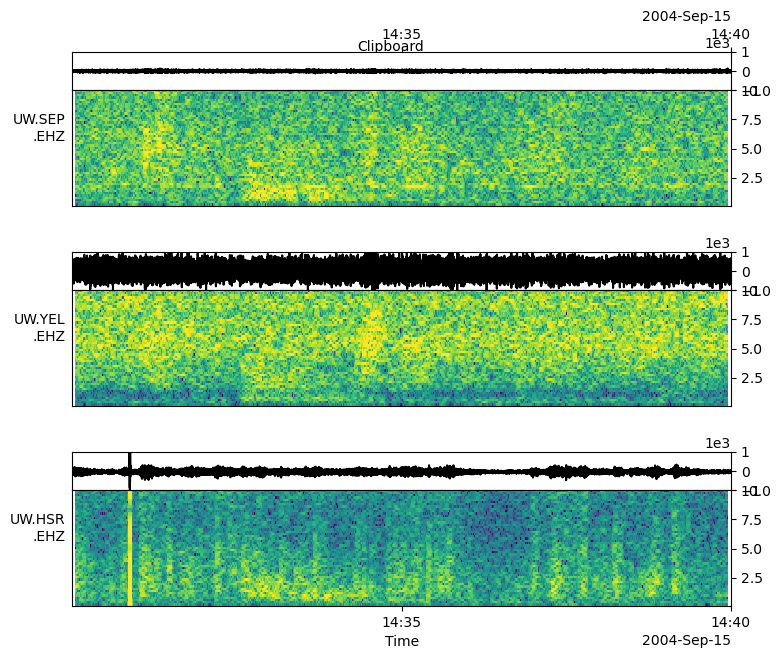

Done.


In [11]:
st = read("../data/waveforms/IRIS_test_data_02.mseed")
st = st.slice(UTCDateTime("2004/09/15 14:30"), UTCDateTime("2004/09/15 14:39:59.999"))

fig = Clipboard(st, mode="wg")
fig.set_spectrogram(overlap=0.86, cmap=vdap_colors.viridis_u)
fig.set_wave(color="k")  # Default behavior
fig.plot()
fig.set_alim([-1000, 1000])
fig.set_flim([0.1, 10.0])
plt.show()  # show the plot
print("Done.")

## Relative Time Axes
### Augustine Volcano, Alaska

By default, UTC timestamps are added to the top and bottom of the plot. Relative ticks (e.g., seconds, minutes, hours, etc.) can be used with tick_type="relative". However, by default, the waves will still be aligned by their UTC timestamps. If you want to align the waves by the relative time axis, set sync_waves=False.

The traces can be manually aligned with scroll_traces() after plot() is called.

This example shows a brittle failure earthquakes, hybrid earthquakes, and low frequency earthquake on the same time scale.

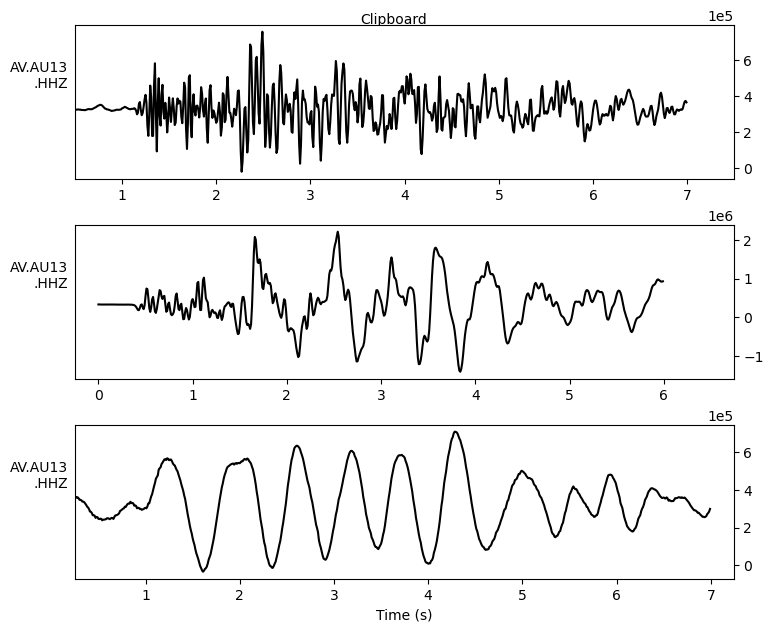

In [12]:
st = read("../data/waveforms/Augustine_test_data_FI.mseed")
fig = Clipboard(st, mode="w", tick_type="relative", sync_waves=False)
fig.plot()

# Move the first trace backwards 0.5 seconds, etc.
fig.scroll_traces(idx=[0, 1, 2], seconds=[-0.5, 0.25, -0.25])
plt.show()  # show the plot